# Extrazione dei vari file
In questa prima fase ci si occuperà dell'estrazione dei vari file contenenti i dati

In [7]:
! unzip data/cineca_job.zip -d data/

Archive:  data/cineca_job.zip
   creating: data/cineca_job/
  inflating: data/cineca_job/job_0.json  
  inflating: data/cineca_job/job_78.json  
  inflating: data/cineca_job/job_150.json  
  inflating: data/cineca_job/job_38.json  
  inflating: data/cineca_job/job_165.json  
  inflating: data/cineca_job/job_74.json  
  inflating: data/cineca_job/job_149.json  
  inflating: data/cineca_job/job_133.json  
  inflating: data/cineca_job/job_43.json  
  inflating: data/cineca_job/job_160.json  
  inflating: data/cineca_job/job_158.json  
  inflating: data/cineca_job/job_98.json  
  inflating: data/cineca_job/job_27.json  
  inflating: data/cineca_job/job_75.json  
  inflating: data/cineca_job/job_114.json  
  inflating: data/cineca_job/job_41.json  
  inflating: data/cineca_job/job_17.json  
  inflating: data/cineca_job/job_91.json  
  inflating: data/cineca_job/job_40.json  
  inflating: data/cineca_job/job_54.json  
  inflating: data/cineca_job/job_94.json  
  inflating: data/cineca_job/jo

Una prima fase di esplorazione delle risorse

In [1]:
import json

with open("data/cineca_job/job_1.json") as f:
    jobs_data = json.load(f)

print(len(jobs_data['jobs']))

ids = set()
smt = []
for job in jobs_data['jobs']:
    tres_req = job['tres']['requested']
    treses = []
    for tres in tres_req:
        ids.add((tres['id'], tres['type'], tres['name']))
    print(job['time']['limit'])
print(ids)



3230
{'set': True, 'infinite': False, 'number': 180}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 30}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 10}
{'set': True, 'infinite': False, 'number': 600}
{'set': True, 'infinite': False, 'number': 1440}
{'set': True, 'infinite': False, 'number': 1440}
{'set': True, 'infinite': False, 'number': 1440}
{'set': True, 'infinite': False, 'number': 1439}
{'set': True, 'infinite': False, 'number': 1440}
{'set': True, 'infinite': False, 'number': 

In [2]:
import json

filenames = [f"data/cineca_job/job_{i}.json" for i in range(10)]
ids = set()
for filename in filenames:
    with open(filename) as f:
        jobs_data = json.load(f)
    for job in jobs_data['jobs']:
        tres_req = job['tres']['requested']
        for tres in tres_req:
            ids.add((tres['id'], tres['type'], tres['name']))
        print(tres_req)
    print(filename, flush=True)
    
print(ids)

[{'type': 'cpu', 'name': '', 'id': 1, 'count': 4}, {'type': 'mem', 'name': '', 'id': 2, 'count': 123000}, {'type': 'node', 'name': '', 'id': 4, 'count': 1}, {'type': 'billing', 'name': '', 'id': 5, 'count': 4}, {'type': 'gres', 'name': 'gpu', 'id': 1001, 'count': 4}]
[{'type': 'cpu', 'name': '', 'id': 1, 'count': 2}, {'type': 'mem', 'name': '', 'id': 2, 'count': 7700}, {'type': 'node', 'name': '', 'id': 4, 'count': 2}, {'type': 'billing', 'name': '', 'id': 5, 'count': 2}, {'type': 'gres', 'name': 'tmpfs', 'id': 1002, 'count': 21474836480}]
[{'type': 'cpu', 'name': '', 'id': 1, 'count': 2}, {'type': 'mem', 'name': '', 'id': 2, 'count': 7700}, {'type': 'node', 'name': '', 'id': 4, 'count': 2}, {'type': 'billing', 'name': '', 'id': 5, 'count': 2}, {'type': 'gres', 'name': 'tmpfs', 'id': 1002, 'count': 21474836480}]
[{'type': 'cpu', 'name': '', 'id': 1, 'count': 2}, {'type': 'mem', 'name': '', 'id': 2, 'count': 7700}, {'type': 'node', 'name': '', 'id': 4, 'count': 2}, {'type': 'billing', '

In [1]:
import json
from multiprocessing import Pool, cpu_count
import gc

STEP = 20

def open_extract(filename:str) -> set:
    with open(filename) as f:
        jobs_data = json.load(f)
    ids = set()
    for job in jobs_data['jobs']:
        tres_req = job['tres']['requested']
        for tres in tres_req:
            ids.add((tres['id'], tres['type'], tres['name']))
    #print(filename)
    return ids

filenames = [f"data/cineca_job/job_{i}.json" for i in range(187)]
ids = set()


for i in range(0, 187, STEP):
    pool = Pool(8)
    print(f"file from {i} to {min(i + STEP, 186)}")
    results = [pool.apply_async(open_extract, (filenames[j],)) for j in range(i, min(i + STEP, 186))]
    results = [proc.get() for proc in results]

    for id_set in results:
        ids = ids.union(id_set)
    pool.close()
    pool.join()
    gc.collect()



file from 0 to 20


Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/tmp/ipykernel_1293/2695396765.py", line 9, in open_extract
    jobs_data = json.load(f)
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
Process ForkPoolWorker-7:
  File "/usr/lib/python3.10/codecs.py", line 319, in decode
    def decode(self, input, final=False):
KeyboardInterrupt
Traceback (most recent call last):


KeyboardInterrupt: 

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/tmp/ipykernel_1293/2695396765.py", line 9, in open_extract
    jobs_data = json.load(f)
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 353, in raw_decode
    obj, end = self.scan_once(s, idx)
KeyboardInterrupt


Process ForkPoolWorker-5:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/tmp/ipykernel_1293/2695396765.py", line 9, in open_extract
    jobs_data = json.load(f)
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 353, in raw_decode
    obj, end = self.scan_once(s, idx)
KeyboardInterrupt
Process ForkPoolWorker-3:
Traceback (most recent call last):
  File 

# Vectorize jobs
Nodes | CPU | Mem | Gres GPU | Gres Tmpfs | Walltime

In [ ]:
import json
from multiprocessing import Pool, cpu_count
import gc
import torch
import numpy as np

STEP = 20
MAX = 187

def open_vectorize(filename:str) -> list:
    with open(filename) as f:
        jobs_data = json.load(f)
    jobs_vec = []
    for job in jobs_data['jobs']:
        job_vec = [0] * 8

        job_vec[5] = job['time']['limit']['number'] if job['time']['limit']['set'] else torch.inf

        job_vec[6] = job['state']['current'][0] 
        tres_req = job['tres']['requested']
        for tres in tres_req:
            if tres['id'] == 1:
                index = 1
            elif tres['id'] == 2:
                index = 2
            elif tres['id'] == 4:
                index = 0
            elif tres['id'] == 1001:
                index = 3
            elif tres['id'] == 1002:
                index = 4
            else:
                continue
            job_vec[index] = tres['count']
        #print(job_vec)
        jobs_vec.append(job_vec)
    #print(filename)

    return jobs_vec


filenames = [f"data/cineca_job/job_{i}.json" for i in range(MAX)]
ids = set()

vectors = []
for i in range(0, MAX, STEP):
    pool = Pool(4)
    print(f"file from {i} to {min(i + STEP, MAX - 1)}")
    results = [pool.apply_async(open_vectorize, (filenames[j],)) for j in range(i, min(i + STEP, MAX - 1))]
    results = [proc.get() for proc in results]

    for vecs in results:
        vectors.extend(vecs)
    
    gc.collect()
    pool.close()
    pool.join()

print(np.array(vectors).shape)


file from 0 to 20
file from 20 to 40
file from 40 to 60
file from 60 to 80
file from 80 to 100
file from 100 to 120
file from 120 to 140
file from 140 to 160
file from 160 to 180
file from 180 to 186
(920122, 7)


In [3]:
import pandas as pd

df = pd.DataFrame(vectors, columns=["Nodes", "CPU", "MEM", "GPU", "Tmpfs", "Walltime", "State"])
df

Nodes  CPU     MEM  GPU        Tmpfs  Walltime    State
0           1    4  123000    4            0     180.0  PENDING
1           2    2    7700    0  21474836480      10.0  PENDING
2           2    2    7700    0  21474836480      10.0  PENDING
3           2    2    7700    0  21474836480      10.0  PENDING
4           2    2    7700    0  21474836480      10.0  PENDING
...       ...  ...     ...  ...          ...       ...      ...
920117      1   32  492800    0            0       5.0  RUNNING
920118      1   32   61440    1            0     300.0  PENDING
920119      1   32  123000    4            0    1440.0  PENDING
920120      2  192  131072    0  21474836480      59.0  PENDING
920121      1   32  225280    4            0      60.0  PENDING

[920122 rows x 7 columns]

In [4]:
enden_df = df[df['State'] != 'PENDING']
enden_df = enden_df[enden_df['State'] != 'RUNNING'].copy()
enden_df['State'].value_counts()

State
COMPLETED        300099
FAILED            65237
CANCELLED         14397
TIMEOUT            6260
OUT_OF_MEMORY       289
NODE_FAIL            27
Name: count, dtype: int64

# Confusion Mat

<Axes: >

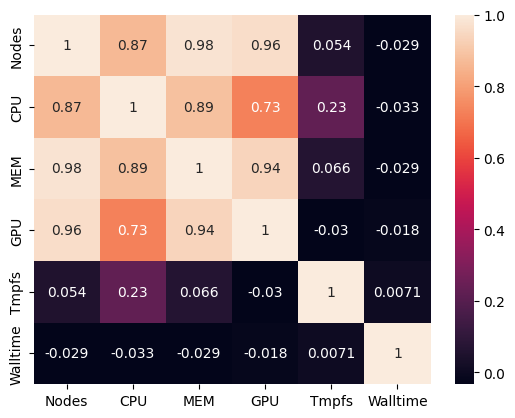

In [5]:
from sklearn.preprocessing import RobustScaler
import seaborn as sns
data = df[["Nodes", "CPU", "MEM", "GPU", "Tmpfs", "Walltime"]].copy()
sns.heatmap(data.corr(), annot=True)

In [6]:
df.describe()

/home/ago/tesi/slurm_ai_sched/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Nodes            CPU           MEM            GPU  \
count  920122.000000  920122.000000  9.201220e+05  920122.000000   
mean        2.352742      76.212021  8.519724e+05       6.427043   
std         9.501355     379.582113  4.653251e+06      37.082098   
min         1.000000       1.000000  1.600000e+01       0.000000   
25%         1.000000       8.000000  4.096000e+04       0.000000   
50%         1.000000      16.000000  2.464000e+05       1.000000   
75%         1.000000      44.000000  4.915200e+05       4.000000   
max       512.000000   16384.000000  2.529280e+08    2048.000000   

              Tmpfs  Walltime  
count  9.201220e+05  920122.0  
mean   2.067879e+11       inf  
std    1.187183e+12       NaN  
min    0.000000e+00       1.0  
25%    0.000000e+00     480.0  
50%    0.000000e+00    1440.0  
75%    1.073742e+10    1440.0  
max    1.759219e+13       inf

In [7]:
df.replace(np.inf, np.nan).describe()

Nodes            CPU           MEM            GPU  \
count  920122.000000  920122.000000  9.201220e+05  920122.000000   
mean        2.352742      76.212021  8.519724e+05       6.427043   
std         9.501355     379.582113  4.653251e+06      37.082098   
min         1.000000       1.000000  1.600000e+01       0.000000   
25%         1.000000       8.000000  4.096000e+04       0.000000   
50%         1.000000      16.000000  2.464000e+05       1.000000   
75%         1.000000      44.000000  4.915200e+05       4.000000   
max       512.000000   16384.000000  2.529280e+08    2048.000000   

              Tmpfs       Walltime  
count  9.201220e+05  882922.000000  
mean   2.067879e+11    1122.806010  
std    1.187183e+12     865.233333  
min    0.000000e+00       1.000000  
25%    0.000000e+00     480.000000  
50%    0.000000e+00    1440.000000  
75%    1.073742e+10    1440.000000  
max    1.759219e+13   10080.000000

<Axes: xlabel='GPU'>

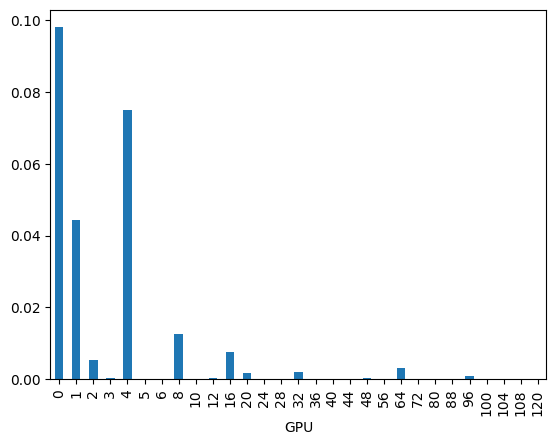

In [8]:
import numpy as np
data = df["GPU"].copy()
data = data[data < data.quantile(0.99)]
freq = data.value_counts() / data.sum()
log_freq = np.log(freq + 1)
log_freq = log_freq.sort_index()
log_freq.plot(kind="bar")

[0, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
['0-4', '4-8', '8-16', '16-32', '32-64', '64-128', '128-256', '256-512', '512-1024', '1024-2048']


/tmp/ipykernel_16170/3625936821.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = freq.groupby("bin").sum()


<Axes: xlabel='bin'>

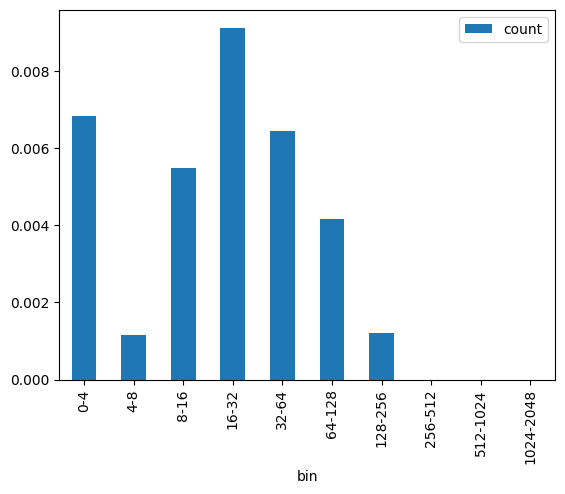

In [19]:
import numpy as np
from numpy import arange

data = df["CPU"].copy()
data = data[data < data.quantile(0.95)]
freq = data.value_counts() / data.sum()
freq = freq.sort_index()
max_i = max(freq.index)
bins = [2**i for i in range(2, int(np.sqrt(max_i)))]
bins.insert(0, 0)
print(bins)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]
print(labels)
#freq = pd.DataFrame(freq)
freq = pd.DataFrame(freq)
freq['bin'] = pd.cut(freq.index, bins=bins, labels=labels, right=False)
freq = freq.groupby("bin").sum()
freq.plot(kind='bar')



<Axes: xlabel='bin'>

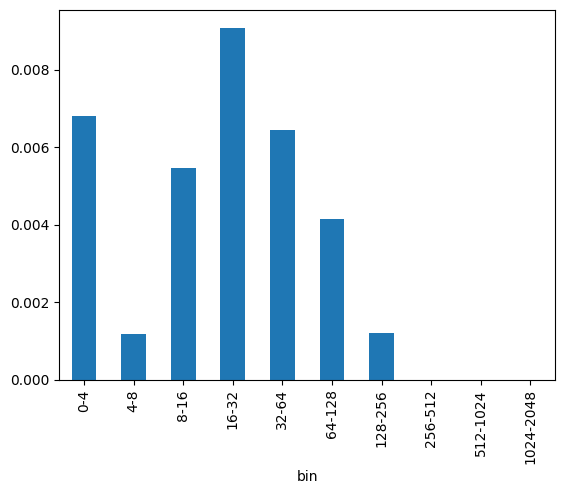

In [18]:
log_freq = np.log(freq['count'] + 1)
#log_freq = log_freq.sort_index()
log_freq.plot(kind='bar')

/tmp/ipykernel_16170/2823134692.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(X_embedded5[:,0], X_embedded5[:,1], cmap=plt.cm.rainbow)
/tmp/ipykernel_16170/2823134692.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(X_embedded15[:,0], X_embedded15[:,1], cmap=plt.cm.rainbow)


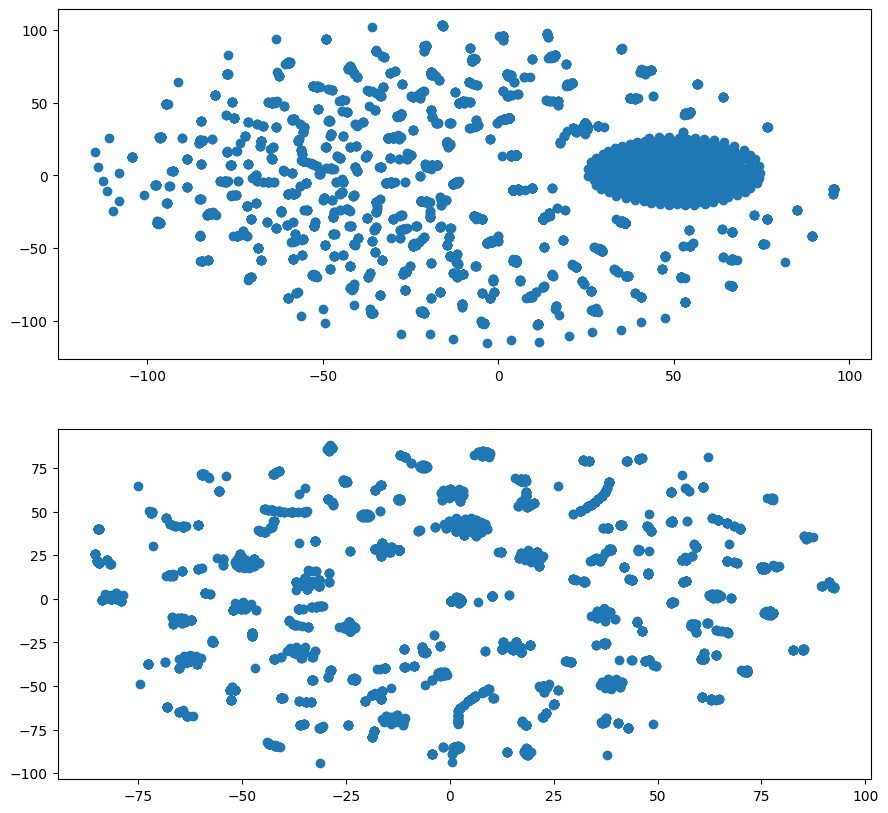

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing

df1 = df.copy()

data = df1.sample(5000)
#label = data[["GPU",]].to_numpy()
data = data[["Nodes", "CPU", "MEM", "GPU", "Tmpfs", "Walltime"]].replace(np.inf, -1)


X_embedded5 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(data)
X_embedded15 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(data)

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10.5, 10)
ax[0].scatter(X_embedded5[:,0], X_embedded5[:,1], cmap=plt.cm.rainbow)
ax[1].scatter(X_embedded15[:,0], X_embedded15[:,1], cmap=plt.cm.rainbow)


/tmp/ipykernel_16170/276689656.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(X_embedded5[:,0], X_embedded5[:,1], cmap=plt.cm.rainbow)
/tmp/ipykernel_16170/276689656.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(X_embedded15[:,0], X_embedded15[:,1], cmap=plt.cm.rainbow)


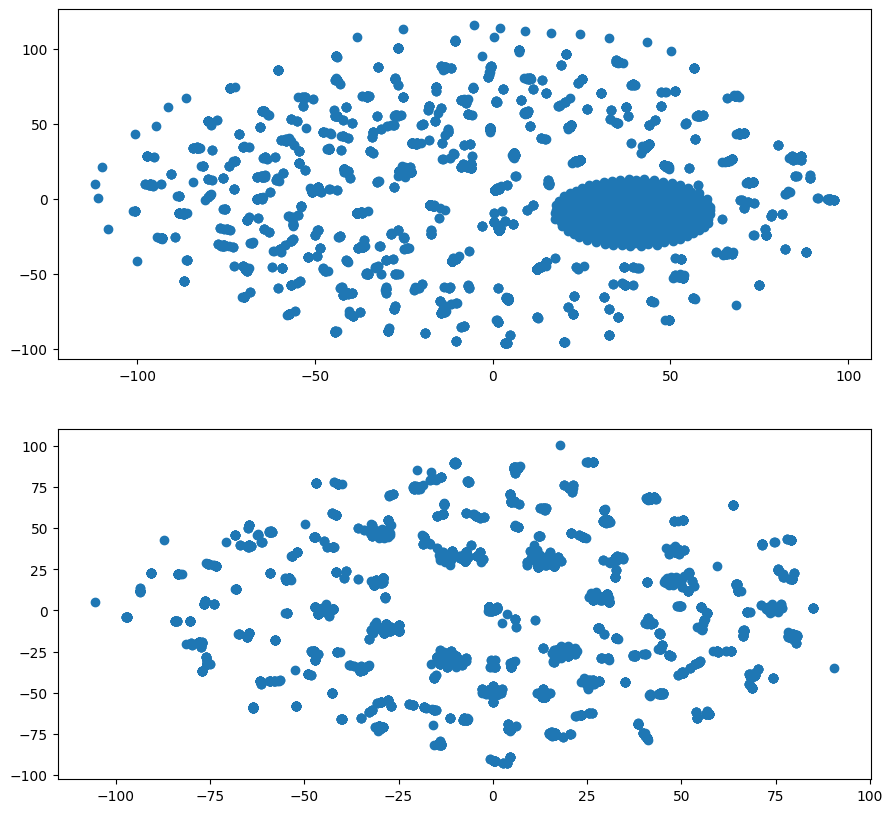

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing

df1 = df.copy()

data = df1.sample(5000)
#label = data[["GPU",]].to_numpy()
data = data[["Nodes", "CPU", "MEM", "GPU", "Walltime"]].replace(np.inf, -1)


X_embedded5 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(data)
X_embedded15 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(data)

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10.5, 10)
ax[0].scatter(X_embedded5[:,0], X_embedded5[:,1], cmap=plt.cm.rainbow)
ax[1].scatter(X_embedded15[:,0], X_embedded15[:,1], cmap=plt.cm.rainbow)


774780     0.0
588366     0.0
552083     0.0
113914    25.0
583951     0.0
          ... 
592390     0.0
753598     0.0
785680     0.0
810566     0.0
309849     0.0
Name: GPU, Length: 5000, dtype: float64


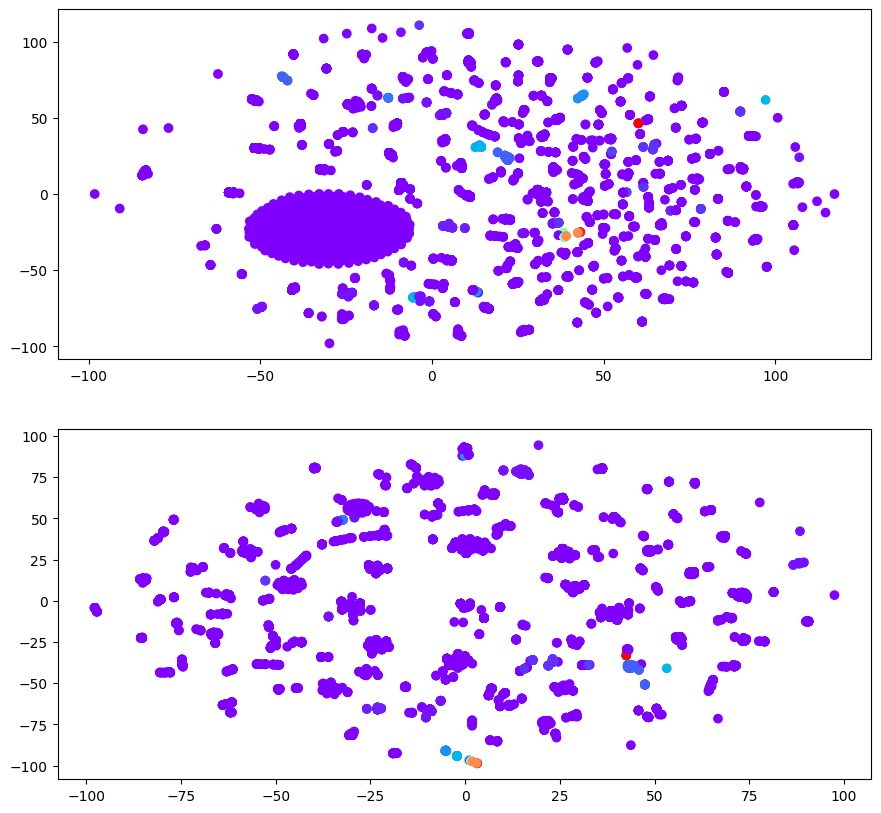

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing

df1 = df.copy()

data = df1.sample(5000)
labels = pd.cut(data["GPU"], bins=np.arange(-1, data["GPU"].max(), 10), labels=False)
data = data[["Nodes", "CPU", "MEM", "Walltime"]].replace(np.inf, -1)


X_embedded5 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(data)
X_embedded15 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(data)

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10.5, 10)
print(labels)
ax[0].scatter(X_embedded5[:,0], X_embedded5[:,1], c=labels, cmap=plt.cm.rainbow)
ax[1].scatter(X_embedded15[:,0], X_embedded15[:,1], c=labels, cmap=plt.cm.rainbow)


153136    0.0
543580    0.0
82554     5.0
758267    0.0
331088    3.0
         ... 
305641    1.0
681466    2.0
610058    6.0
390702    0.0
587868    2.0
Name: CPU, Length: 5000, dtype: float64


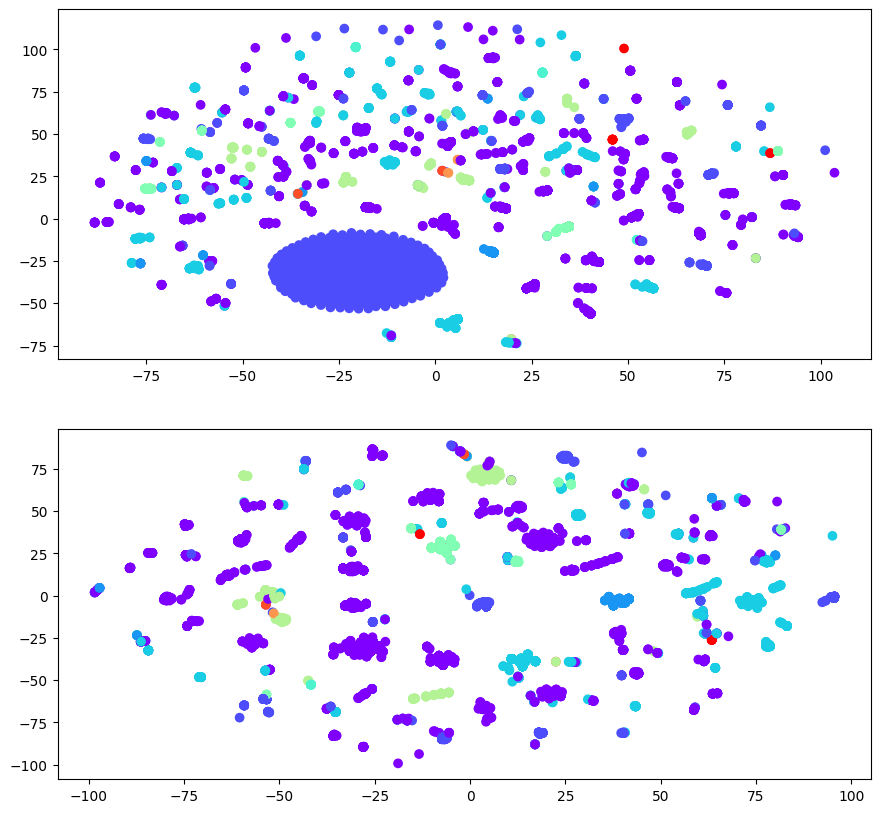

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing

df1 = df.copy()
df1 = df1[df1['CPU'] < df1['CPU'].quantile(0.9)]
data = df1.sample(5000)
labels = pd.cut(data["CPU"], bins=np.arange(-1, data["CPU"].max(), 10), labels=False)
data = data[["Nodes", "GPU", "MEM", "Walltime"]].replace(np.inf, -1)


X_embedded5 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(data)
X_embedded15 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(data)

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10.5, 10)
print(labels)
ax[0].scatter(X_embedded5[:,0], X_embedded5[:,1], c=labels, cmap=plt.cm.rainbow)
ax[1].scatter(X_embedded15[:,0], X_embedded15[:,1], c=labels, cmap=plt.cm.rainbow)


680394    0.0
458757    0.0
170569    0.0
497146    0.0
286841    0.0
         ... 
270912    0.0
532331    0.0
623382    0.0
455654    0.0
42418     0.0
Name: Nodes, Length: 5000, dtype: float64


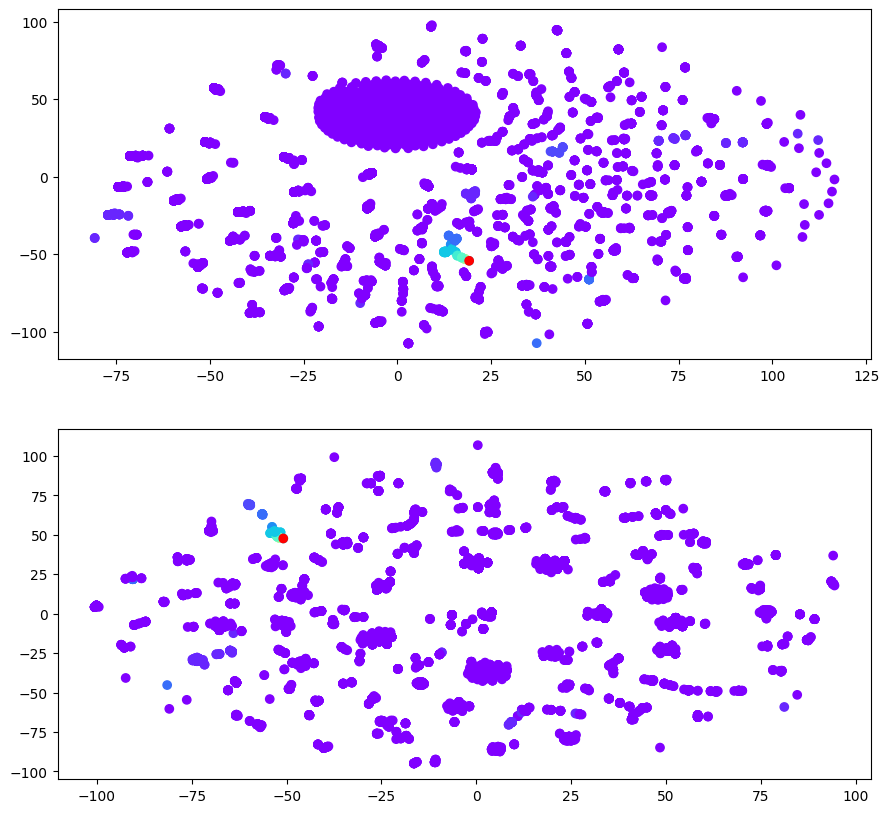

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing

df1 = df.copy()
data = df1.sample(5000)
labels = pd.cut(data["Nodes"], bins=np.arange(-1, data["Nodes"].max(), 10), labels=False)
data = data[["CPU", "GPU", "MEM", "Walltime"]].replace(np.inf, -1)


X_embedded5 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(data)
X_embedded15 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(data)

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10.5, 10)
print(labels)
ax[0].scatter(X_embedded5[:,0], X_embedded5[:,1], c=labels, cmap=plt.cm.rainbow)
ax[1].scatter(X_embedded15[:,0], X_embedded15[:,1], c=labels, cmap=plt.cm.rainbow)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing

df1 = df.copy()
df1 = df1[np.isfinite(data["Walltime"])]
data = df1.sample(5000).replace(np.inf, 24*5*60)
labels = pd.cut(data["Walltime"], bins=np.arange(-1, data["Walltime"].max(), 10), labels=False)
data = data[["CPU", "GPU", "MEM", "Nodes"]]


X_embedded5 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(data)
X_embedded15 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(data)

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10.5, 10)
print(labels)
ax[0].scatter(X_embedded5[:,0], X_embedded5[:,1], c=labels, cmap=plt.cm.rainbow)
ax[1].scatter(X_embedded15[:,0], X_embedded15[:,1], c=labels, cmap=plt.cm.rainbow)

KeyboardInterrupt: 